In [7]:
from ucimlrepo import fetch_ucirepo
online_retail = fetch_ucirepo(id=352)

# data (as pandas dataframes)
X = online_retail.data.features
y = online_retail.data.targets


In [11]:
df = pd.concat([X, y], axis=1)


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:130%; text-align:left">

<h2 align="left"><font color=#ff6200>Problem:</font></h2>


In this project, we delve deep into the thriving sector of __online retail__ by analyzing a __transactional dataset__ from a UK-based retailer, available at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/352/online+retail). This dataset documents all transactions between 2010 and 2011. Our primary objective is to amplify the efficiency of marketing strategies and boost sales through __customer segmentation__. We aim to transform the transactional data into a customer-centric dataset by creating new features that will facilitate the segmentation of customers into distinct groups using the __K-means clustering__ algorithm. This segmentation will allow us to understand the distinct __profiles__ and preferences of different customer groups. Building upon this, we intend to develop a __recommendation system__ that will suggest top-selling products to customers within each segment who haven't purchased those items yet, ultimately enhancing marketing efficacy and fostering increased sales.


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:130%; text-align:left">

<h2 align="left"><font color=#ff6200>Objectives:</font></h2>


- **Data Cleaning & Transformation**: Clean the dataset by handling missing values, duplicates, and outliers, preparing it for effective clustering.

    
- **Feature Engineering**: Develop new features based on the transactional data to create a customer-centric dataset, setting the foundation for customer segmentation.

    
- **Data Preprocessing**: Undertake feature scaling and dimensionality reduction to streamline the data, enhancing the efficiency of the clustering process.

    
- **Customer Segmentation using K-Means Clustering**: Segment customers into distinct groups using K-means, facilitating targeted marketing and personalized strategies.

    
- **Cluster Analysis & Evaluation**: Analyze and profile each cluster to develop targeted marketing strategies and assess the quality of the clusters formed.

    
- **Recommendation System**: Implement a system to recommend best-selling products to customers within the same cluster who haven't purchased those products, aiming to boost sales and marketing effectiveness.


<a id="libraries"></a>
# <b><span style='color:#fcc36d'>Step 1.1 |</span><span style='color:#ff6200'> Importing Necessary Libraries</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors
from scipy.stats import linregress
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from tabulate import tabulate
from collections import Counter

%matplotlib inline

In [ ]:
# Initialize Plotly for use in the notebook
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [ ]:
# Configure Seaborn plot styles: Set background color and use dark grid
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')

<a id="load_dataset"></a>
# <b><span style='color:#fcc36d'>Step 1.2 |</span><span style='color:#ff6200'> Loading the Dataset</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

In [ ]:
pip install ucimlrepo


In [ ]:
from ucimlrepo import fetch_ucirepo
online_retail = fetch_ucirepo(id=352)

# data (as pandas dataframes)
X = online_retail.data.features
y = online_retail.data.targets


In [ ]:
df = pd.concat([X, y], axis=1)


In [12]:
df

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:130%; text-align:left">

<h2 align="left"><font color=#ff6200>Dataset Description:</font></h2>

| __Variable__   | __Description__ |
|     :---       |       :---      |      
| __InvoiceNo__  | Code representing each unique transaction.  If this code starts with letter 'c', it indicates a cancellation. |
| __StockCode__  | Code uniquely assigned to each distinct product. |
| __Description__| Description of each product. |
| __Quantity__   | The number of units of a product in a transaction. |
| __InvoiceDate__| The date and time of the transaction. |
| __UnitPrice__  | The unit price of the product in sterling. |
| __CustomerID__ | Identifier uniquely assigned to each customer. |
| __Country__    | The country of the customer. |


In [ ]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


<a id="statistics"></a>
# <b><span style='color:#fcc36d'>Step 2.2 |</span><span style='color:#ff6200'> Summary Statistics</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
Now, I am going to generate summary statistics to gain initial insights into the data distribution:

In [ ]:
# Summary statistics for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


<a id="data_cleaning"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 3 |  Data Cleaning & Transformation</p>
⬆️ [Tabel of Contents](#contents_tabel)

<a id="missing_values"></a>
# <b><span style='color:#fcc36d'>Step 3.1 |</span><span style='color:#ff6200'> Handling Missing Values</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
Initially, I will determine the percentage of missing values present in each column, followed by selecting the most effective strategy to address them:

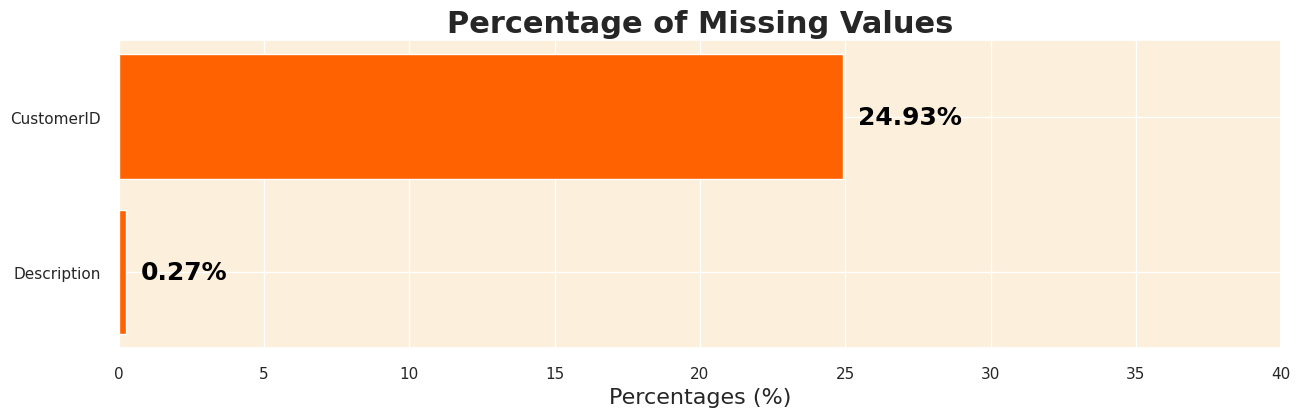

In [ ]:
# Calculating the percentage of missing values for each column
missing_data = df.isnull().sum()
missing_percentage = (missing_data[missing_data > 0] / df.shape[0]) * 100

# Prepare values
missing_percentage.sort_values(ascending=True, inplace=True)

# Plot the barh chart
fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(missing_percentage.index, missing_percentage, color='#ff6200')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(missing_percentage, missing_percentage.index)):
    ax.text(value+0.5, i, f"{value:.2f}%", ha='left', va='center', fontweight='bold', fontsize=18, color='black')

# Set x-axis limit
ax.set_xlim([0, 40])

# Add title and xlabel
plt.title("Percentage of Missing Values", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()

In [ ]:
# Extracting rows with missing values in 'CustomerID' or 'Description' columns
df[df['CustomerID'].isnull() | df['Description'].isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [ ]:
# Removing rows with missing values in 'CustomerID' and 'Description' columns
df = df.dropna(subset=['CustomerID', 'Description'])

In [ ]:
# Verifying the removal of missing values
df.isnull().sum().sum()

0

<a id="duplicates"></a>
# <b><span style='color:#fcc36d'>Step 3.2 |</span><span style='color:#ff6200'> Handling Duplicates</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
Next, I am going to recognize duplicate rows in the dataset:

In [ ]:
# Finding duplicate rows (keeping all instances)
duplicate_rows = df[df.duplicated(keep=False)]

# Sorting the data by certain columns to see the duplicate rows next to each other
duplicate_rows_sorted = duplicate_rows.sort_values(by=['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Quantity'])

# Displaying the first 10 records
duplicate_rows_sorted.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
578,536412,21448,12 DAISY PEGS IN WOOD BOX,1,12/1/2010 11:49,1.65,17920.0,United Kingdom
598,536412,21448,12 DAISY PEGS IN WOOD BOX,1,12/1/2010 11:49,1.65,17920.0,United Kingdom


In [ ]:
# Displaying the number of duplicate rows
print(f"The dataset contains {df.duplicated().sum()} duplicate rows that need to be removed.")

# Removing duplicate rows
df.drop_duplicates(inplace=True)

The dataset contains 5225 duplicate rows that need to be removed.


In [ ]:
# Getting the number of rows in the dataframe
df.shape[0]

401604

<a id="InvoiceNo_cleaning"></a>
# <b><span style='color:#fcc36d'>Step 3.3 |</span><span style='color:#ff6200'> Treating Cancelled Transactions</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

To refine our understanding of customer behavior and preferences, we need to take into account the transactions that were cancelled. Initially, we will identify these transactions by filtering the rows where the `InvoiceNo` starts with "C". Subsequently, we will analyze these rows to understand their common characteristics or patterns:

In [ ]:
# Filter out the rows with InvoiceNo starting with "C" and create a new column indicating the transaction status
df['Transaction_Status'] = np.where(df['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')

# Analyze the characteristics of these rows (considering the new column)
cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled']
cancelled_transactions.describe().drop('CustomerID', axis=1)

,Quantity,UnitPrice
count,8872.000000,8872.000000
mean,-30.774910,18.899512
std,1172.249902,445.190864
min,-80995.000000,0.010000
25%,-6.000000,1.450000
50%,-2.000000,2.950000
75%,-1.000000,4.950000
max,-1.000000,38970.000000


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Inferences from the Cancelled Transactions Data:</font></h3>

- All quantities in the cancelled transactions are negative, indicating that these are indeed orders that were cancelled.
    
    
- The `UnitPrice` column has a considerable spread, showing that a variety of products, from low to high value, were part of the cancelled transactions.



In [ ]:
# Finding the percentage of cancelled transactions
cancelled_percentage = (cancelled_transactions.shape[0] / df.shape[0]) * 100

# Printing the percentage of cancelled transactions
print(f"The percentage of cancelled transactions in the dataset is: {cancelled_percentage:.2f}%")

The percentage of cancelled transactions in the dataset is: 2.21%


<a id="StockCode_cleaning"></a>
# <b><span style='color:#fcc36d'>Step 3.4 |</span><span style='color:#ff6200'> Correcting StockCode Anomalies</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

First of all, lets find the number of unique stock codes and to plot the top 10 most frequent stock codes along with their percentage frequency:

In [ ]:
# Finding the number of unique stock codes
unique_stock_codes = df['StockCode'].nunique()

# Printing the number of unique stock codes
print(f"The number of unique stock codes in the dataset is: {unique_stock_codes}")

The number of unique stock codes in the dataset is: 3684


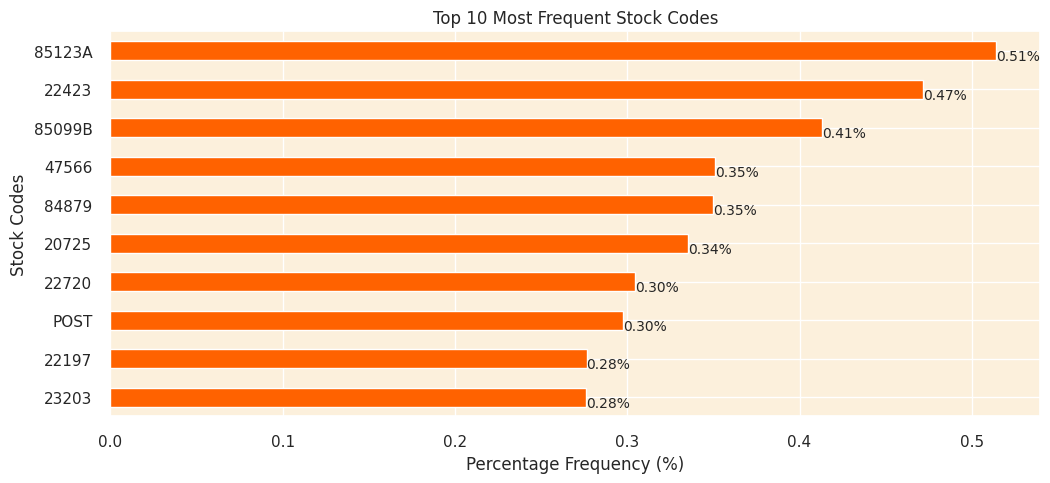

In [ ]:
# Finding the top 10 most frequent stock codes
top_10_stock_codes = df['StockCode'].value_counts(normalize=True).head(10) * 100

# Plotting the top 10 most frequent stock codes
plt.figure(figsize=(12, 5))
top_10_stock_codes.plot(kind='barh', color='#ff6200')

# Adding the percentage frequency on the bars
for index, value in enumerate(top_10_stock_codes):
    plt.text(value, index+0.25, f'{value:.2f}%', fontsize=10)

plt.title('Top 10 Most Frequent Stock Codes')
plt.xlabel('Percentage Frequency (%)')
plt.ylabel('Stock Codes')
plt.gca().invert_yaxis()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
To delve deeper into identifying these anomalies, let's explore the frequency of the number of numeric characters in the stock codes, which can provide insights into the nature of these unusual entries:

In [ ]:
# Finding the number of numeric characters in each unique stock code
unique_stock_codes = df['StockCode'].unique()
numeric_char_counts_in_unique_codes = pd.Series(unique_stock_codes).apply(lambda x: sum(c.isdigit() for c in str(x))).value_counts()

# Printing the value counts for unique stock codes
print("Value counts of numeric character frequencies in unique stock codes:")
print("-"*70)
print(numeric_char_counts_in_unique_codes)

Value counts of numeric character frequencies in unique stock codes:
----------------------------------------------------------------------
5    3676
0       7
1       1
Name: count, dtype: int64


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Inference:</font></h3>

The output indicates the following:

- A majority of the unique stock codes (3676 out of 3684) contain exactly 5 numeric characters, which seems to be the standard format for representing product codes in this dataset.

    
- There are a few anomalies: 7 stock codes contain no numeric characters and 1 stock code contains only 1 numeric character. These are clearly deviating from the standard format and need further investigation to understand their nature and whether they represent valid product transactions.

Now, let's identify the stock codes that contain 0 or 1 numeric characters to further understand these anomalies:

In [ ]:
# Finding and printing the stock codes with 0 and 1 numeric characters
anomalous_stock_codes = [code for code in unique_stock_codes if sum(c.isdigit() for c in str(code)) in (0, 1)]

# Printing each stock code on a new line
print("Anomalous stock codes:")
print("-"*22)
for code in anomalous_stock_codes:
    print(code)

Anomalous stock codes:
----------------------
POST
D
C2
M
BANK CHARGES
PADS
DOT
CRUK


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
Let's calculate the percentage of records with these anomalous stock codes:    

In [ ]:
# Calculating the percentage of records with these stock codes
percentage_anomalous = (df['StockCode'].isin(anomalous_stock_codes).sum() / len(df)) * 100

# Printing the percentage
print(f"The percentage of records with anomalous stock codes in the dataset is: {percentage_anomalous:.2f}%")

The percentage of records with anomalous stock codes in the dataset is: 0.48%


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

<h3 align="left"><font color=#ff6200>Inference:</font></h3>

Based on the analysis, we find that a very small proportion of the records, __0.48%__, have anomalous stock codes, which deviate from the typical format observed in the majority of the data. Also, these anomalous codes are just a fraction among all unique stock codes (__only 8 out of 3684__).

These codes seem to represent non-product transactions like "__BANK CHARGES__", "__POST__" (possibly postage fees), etc. Since they do not represent actual products and are a very small proportion of the dataset, including them in the analysis might introduce noise and distort the clustering and recommendation system.

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
Thus, the strategy would be to filter out and remove rows with these anomalous stock codes from the dataset before proceeding with further analysis and model development:

In [ ]:
# Removing rows with anomalous stock codes from the dataset
df = df[~df['StockCode'].isin(anomalous_stock_codes)]

In [ ]:
# Getting the number of rows in the dataframe
df.shape[0]

399689

<a id="Description_cleaning"></a>
# <b><span style='color:#fcc36d'>Step 3.5 |</span><span style='color:#ff6200'> Cleaning Description Column</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
First, I will calculate the occurrence count of each unique description in the dataset. Then, I will plot the top 30 descriptions. This visualization will give a clear view of the highest occurring descriptions in the dataset:

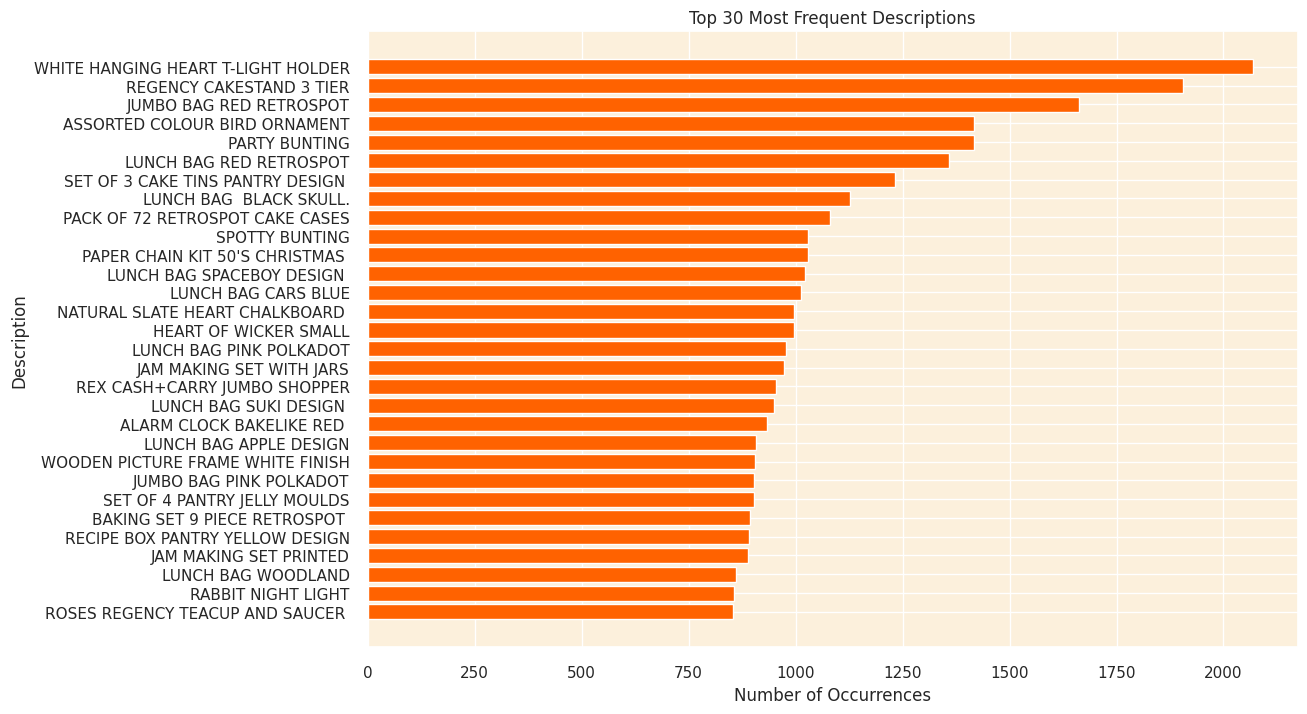

In [ ]:
# Calculate the occurrence of each unique description and sort them
description_counts = df['Description'].value_counts()

# Get the top 30 descriptions
top_30_descriptions = description_counts[:30]

# Plotting
plt.figure(figsize=(12,8))
plt.barh(top_30_descriptions.index[::-1], top_30_descriptions.values[::-1], color='#ff6200')

# Adding labels and title
plt.xlabel('Number of Occurrences')
plt.ylabel('Description')
plt.title('Top 30 Most Frequent Descriptions')

# Show the plot
plt.show()

In [ ]:
# Find unique descriptions containing lowercase characters
lowercase_descriptions = df['Description'].unique()
lowercase_descriptions = [desc for desc in lowercase_descriptions if any(char.islower() for char in desc)]

# Print the unique descriptions containing lowercase characters
print("The unique descriptions containing lowercase characters are:")
print("-"*60)
for desc in lowercase_descriptions:
    print(desc)

The unique descriptions containing lowercase characters are:
------------------------------------------------------------
BAG 500g SWIRLY MARBLES
POLYESTER FILLER PAD 45x45cm
POLYESTER FILLER PAD 45x30cm
POLYESTER FILLER PAD 40x40cm
FRENCH BLUE METAL DOOR SIGN No
BAG 250g SWIRLY MARBLES
BAG 125g SWIRLY MARBLES
3 TRADITIONAl BISCUIT CUTTERS  SET
NUMBER TILE COTTAGE GARDEN No
FOLK ART GREETING CARD,pack/12
ESSENTIAL BALM 3.5g TIN IN ENVELOPE
POLYESTER FILLER PAD 65CMx65CM
NUMBER TILE VINTAGE FONT No 
POLYESTER FILLER PAD 30CMx30CM
POLYESTER FILLER PAD 60x40cm
FLOWERS HANDBAG blue and orange
Next Day Carriage
THE KING GIFT BAG 25x24x12cm
High Resolution Image


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Inference:</font></h3>
    
- Upon reviewing the descriptions that contain lowercase characters, it is evident that some entries are not product descriptions, such as "__Next Day Carriage__" and "__High Resolution Image__". These entries seem to be unrelated to the actual products and might represent other types of information or service details.

In [ ]:
service_related_descriptions = ["Next Day Carriage", "High Resolution Image"]

# Calculate the percentage of records with service-related descriptions
service_related_percentage = df[df['Description'].isin(service_related_descriptions)].shape[0] / df.shape[0] * 100

# Print the percentage of records with service-related descriptions
print(f"The percentage of records with service-related descriptions in the dataset is: {service_related_percentage:.2f}%")

# Remove rows with service-related information in the description
df = df[~df['Description'].isin(service_related_descriptions)]

# Standardize the text to uppercase to maintain uniformity across the dataset
df['Description'] = df['Description'].str.upper()

The percentage of records with service-related descriptions in the dataset is: 0.02%


In [ ]:
# Getting the number of rows in the dataframe
df.shape[0]

399606

<a id="UnitPrice_cleaning"></a>
# <b><span style='color:#fcc36d'>Step 3.6 |</span><span style='color:#ff6200'> Treating Zero Unit Prices</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
In this step, first I am going to take a look at the statistical description of the `UnitPrice` column:

In [ ]:
df['UnitPrice'].describe()

count    399606.000000
mean          2.904957
std           4.448796
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max         649.500000
Name: UnitPrice, dtype: float64

In [ ]:
df[df['UnitPrice']==0].describe()[['Quantity']]

,Quantity
count,33.000000
mean,420.515152
std,2176.713608
min,1.000000
25%,2.000000
50%,11.000000
75%,36.000000
max,12540.000000


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Inferences on UnitPrice: </font></h3>

- The transactions with a unit price of zero are relatively few in number (33 transactions).
    
    
- These transactions have a large variability in the quantity of items involved, ranging from 1 to 12540, with a substantial standard deviation.
    
    
- Including these transactions in the clustering analysis might introduce noise and could potentially distort the customer behavior patterns identified by the clustering algorithm.

In [ ]:
# Removing records with a unit price of zero to avoid potential data entry errors
df = df[df['UnitPrice'] > 0]

<a id="outlier_cleaning"></a>
# <b><span style='color:#fcc36d'>Step 3.7 |</span><span style='color:#ff6200'> Outlier Treatment</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
In K-means clustering, the algorithm is sensitive to both the scale of data and the presence of outliers, as they can significantly influence the position of centroids, potentially leading to incorrect cluster assignments. However, considering the context of this project where the final goal is to understand customer behavior and preferences through K-means clustering, it would be more prudent to address the issue of outliers __after the feature engineering phase__ where we create a customer-centric dataset. At this stage, the data is transactional, and removing outliers might eliminate valuable information that could play a crucial role in segmenting customers later on. Therefore, we will postpone the outlier treatment and proceed to the next stage for now.

In [ ]:
# Resetting the index of the cleaned dataset
df.reset_index(drop=True, inplace=True)

In [ ]:
# Getting the number of rows in the dataframe
df.shape[0]

404826

<a id="feature_engineering"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 4 | Feature Engineering</p>
⬆️ [Tabel of Contents](#contents_tabel)

<a id="rfm_features"></a>
# <b><span style='color:#fcc36d'>Step 4.1 |</span><span style='color:#ff6200'> RFM Features</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<a id="recency"></a>
## <b><span style='color:#fcc36d'>Step 4.1.1 |</span><span style='color:#ff6200'> Recency (R)</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

In [ ]:
# Convert InvoiceDate to datetime type
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Convert InvoiceDate to datetime and extract only the date
df['InvoiceDay'] = df['InvoiceDate'].dt.date

# Find the most recent purchase date for each customer
customer_data = df.groupby('CustomerID')['InvoiceDay'].max().reset_index()

# Find the most recent date in the entire dataset
most_recent_date = df['InvoiceDay'].max()

# Convert InvoiceDay to datetime type before subtraction
customer_data['InvoiceDay'] = pd.to_datetime(customer_data['InvoiceDay'])
most_recent_date = pd.to_datetime(most_recent_date)

# Calculate the number of days since the last purchase for each customer
customer_data['Days_Since_Last_Purchase'] = (most_recent_date - customer_data['InvoiceDay']).dt.days

# Remove the InvoiceDay column
customer_data.drop(columns=['InvoiceDay'], inplace=True)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
Now, __customer_data__ dataframe contains the __`Days_Since_Last_Purchase`__ feature:

In [ ]:
customer_data.head()

,CustomerID,Days_Since_Last_Purchase
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310


<a id="frequency"></a>
## <b><span style='color:#fcc36d'>Step 4.1.2 |</span><span style='color:#ff6200'> Frequency (F)</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

In [ ]:
# Calculate the total number of transactions made by each customer
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
total_transactions.rename(columns={'InvoiceNo': 'Total_Transactions'}, inplace=True)

# Calculate the total number of products purchased by each customer
total_products_purchased = df.groupby('CustomerID')['Quantity'].sum().reset_index()
total_products_purchased.rename(columns={'Quantity': 'Total_Products_Purchased'}, inplace=True)

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, total_transactions, on='CustomerID')
customer_data = pd.merge(customer_data, total_products_purchased, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased
0,12346.0,325,2,0
1,12347.0,2,7,2458
2,12348.0,75,4,2332
3,12349.0,18,1,630
4,12350.0,310,1,196


<a id="monetary"></a>
## <b><span style='color:#fcc36d'>Step 4.1.3 |</span><span style='color:#ff6200'> Monetary (M)</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

In [ ]:
# Calculate the total spend by each customer
df['Total_Spend'] = df['UnitPrice'] * df['Quantity']
total_spend = df.groupby('CustomerID')['Total_Spend'].sum().reset_index()

# Calculate the average transaction value for each customer
average_transaction_value = total_spend.merge(total_transactions, on='CustomerID')
average_transaction_value['Average_Transaction_Value'] = average_transaction_value['Total_Spend'] / average_transaction_value['Total_Transactions']

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, total_spend, on='CustomerID')
customer_data = pd.merge(customer_data, average_transaction_value[['CustomerID', 'Average_Transaction_Value']], on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value
0,12346.0,325,2,0,0.00,0.000000
1,12347.0,2,7,2458,4310.00,615.714286
2,12348.0,75,4,2332,1437.24,359.310000
3,12349.0,18,1,630,1457.55,1457.550000
4,12350.0,310,1,196,294.40,294.400000


<a id="outlier_detection"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 5 | Outlier Detection and Treatment</p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

In this section, I will identify and handle outliers in our dataset. Outliers are data points that are significantly different from the majority of other points in the dataset. These points can potentially skew the results of our analysis, especially in k-means clustering where they can significantly influence the position of the cluster centroids. Therefore, it is essential to identify and treat these outliers appropriately to achieve more accurate and meaningful clustering results.

Given the multi-dimensional nature of the data, it would be prudent to use algorithms that can detect outliers in multi-dimensional spaces. I am going to use the __Isolation Forest__ algorithm for this task. This algorithm works well for multi-dimensional data and is computationally efficient. It isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

Let's proceed with this approach:

In [ ]:
# Initializing the IsolationForest model with a contamination parameter of 0.05
model = IsolationForest(contamination=0.05, random_state=0)

# Fitting the model on our dataset (converting DataFrame to NumPy to avoid warning)
customer_data['Outlier_Scores'] = model.fit_predict(customer_data.iloc[:, 1:].to_numpy())

# Creating a new column to identify outliers (1 for inliers and -1 for outliers)
customer_data['Is_Outlier'] = [1 if x == -1 else 0 for x in customer_data['Outlier_Scores']]

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Average_Days_Between_Purchases,Day_Of_Week,Hour,Outlier_Scores,Is_Outlier
0,12346.0,325,2,0,0.00,0.000000,0.000000,1,10,1,0
1,12347.0,2,7,2458,4310.00,615.714286,2.016575,1,14,1,0
2,12348.0,75,4,2332,1437.24,359.310000,10.884615,3,19,-1,1
3,12349.0,18,1,630,1457.55,1457.550000,0.000000,0,9,1,0
4,12350.0,310,1,196,294.40,294.400000,0.000000,2,16,1,0


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
After applying the Isolation Forest algorithm, we have identified the outliers and marked them in a new column named `Is_Outlier`. We have also calculated the outlier scores which represent the anomaly score of each record.

Now let's visualize the distribution of these scores and the number of inliers and outliers detected by the model:

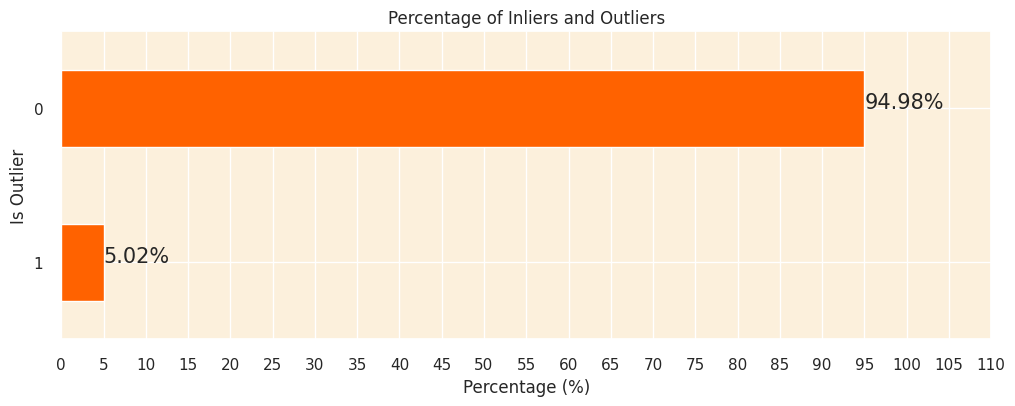

In [ ]:
# Calculate the percentage of inliers and outliers
outlier_percentage = customer_data['Is_Outlier'].value_counts(normalize=True) * 100

# Plotting the percentage of inliers and outliers
plt.figure(figsize=(12, 4))
outlier_percentage.plot(kind='barh', color='#ff6200')

# Adding the percentage labels on the bars
for index, value in enumerate(outlier_percentage):
    plt.text(value, index, f'{value:.2f}%', fontsize=15)

plt.title('Percentage of Inliers and Outliers')
plt.xticks(ticks=np.arange(0, 115, 5))
plt.xlabel('Percentage (%)')
plt.ylabel('Is Outlier')
plt.gca().invert_yaxis()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Inference: </font></h3>
    
From the above plot, we can observe that about 5% of the customers have been identified as outliers in our dataset. This percentage seems to be a reasonable proportion, not too high to lose a significant amount of data, and not too low to retain potentially noisy data points. It suggests that our isolation forest algorithm has worked well in identifying a moderate percentage of outliers, which will be critical in refining our customer segmentation.

In [ ]:
# Separate the outliers for analysis
outliers_data = customer_data[customer_data['Is_Outlier'] == 1]

# Remove the outliers from the main dataset
customer_data_cleaned = customer_data[customer_data['Is_Outlier'] == 0]

# Drop the 'Outlier_Scores' and 'Is_Outlier' columns
customer_data_cleaned = customer_data_cleaned.drop(columns=['Outlier_Scores', 'Is_Outlier'])


# Reset the index of the cleaned data
customer_data_cleaned.reset_index(drop=True, inplace=True)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
We have successfully separated the outliers for further analysis and cleaned our main dataset by removing these outliers. This cleaned dataset is now ready for the next steps in our customer segmentation project, which includes scaling the features and applying clustering algorithms to identify distinct customer segments.

In [ ]:
# Getting the number of rows in the cleaned customer dataset
customer_data_cleaned.shape[0]

4067

<a id="correlation"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 6 | Correlation Analysis</p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

Before we proceed to KMeans clustering, it's essential to check the correlation between features in our dataset. The presence of __multicollinearity__, where __features are highly correlated__, can potentially affect the clustering process by not allowing the model to learn the actual underlying patterns in the data, as the features do not provide unique information. This could lead to clusters that are not well-separated and meaningful.

If we identify multicollinearity, we can utilize dimensionality reduction techniques like PCA. These techniques help in neutralizing the effect of multicollinearity by transforming the correlated features into a new set of uncorrelated variables, preserving most of the original data's variance. This step not only enhances the quality of clusters formed but also makes the clustering process more computationally efficient.

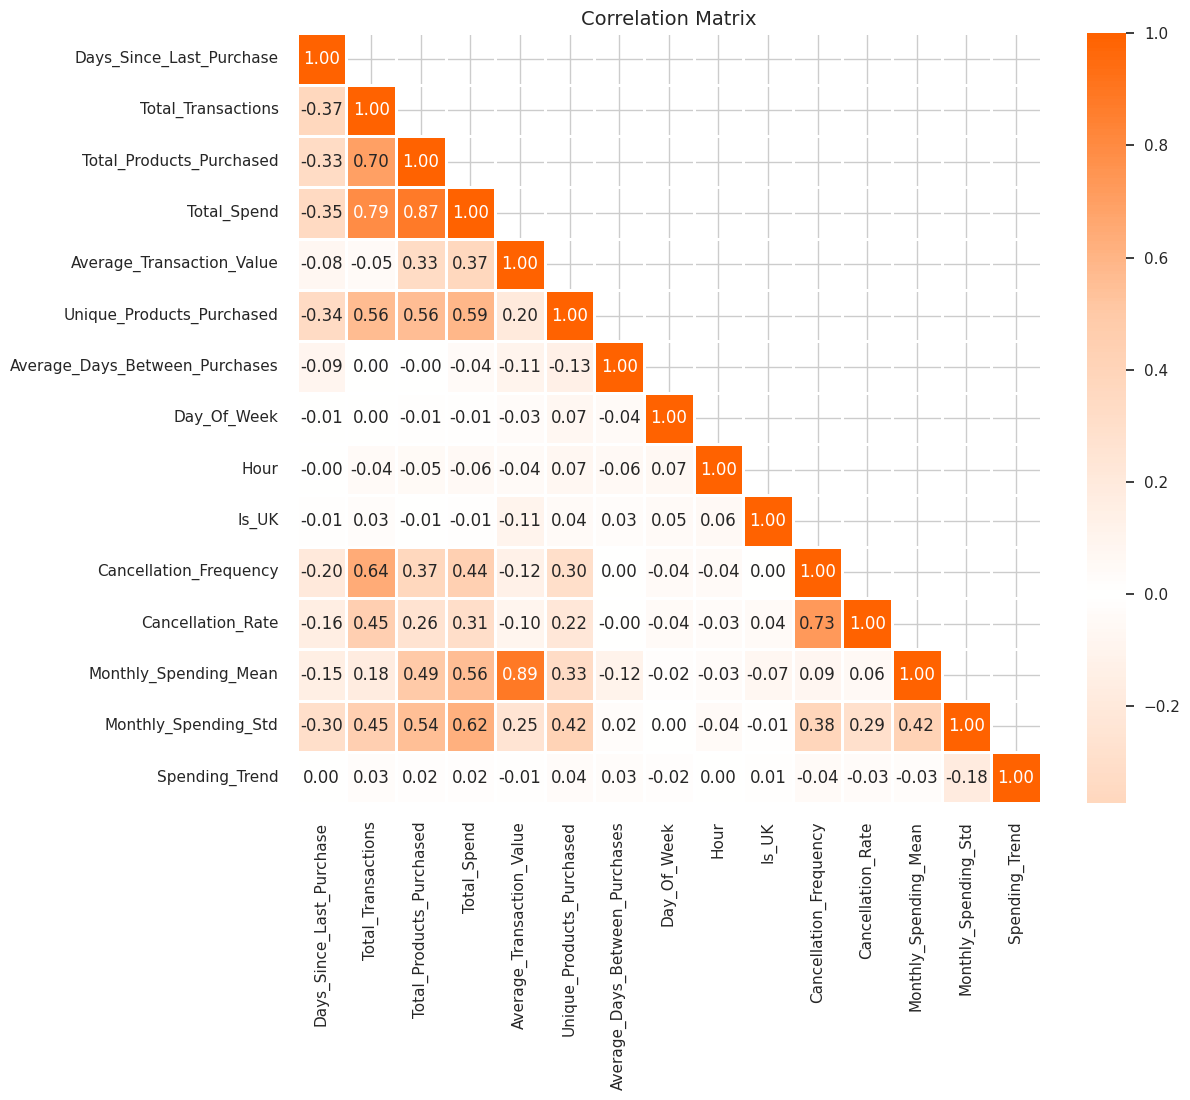

In [ ]:
# Reset background style
sns.set_style('whitegrid')

# Calculate the correlation matrix excluding the 'CustomerID' column
corr = customer_data_cleaned.drop(columns=['CustomerID']).corr()

# Define a custom colormap
colors = ['#ff6200', '#ffcaa8', 'white', '#ffcaa8', '#ff6200']
my_cmap = LinearSegmentedColormap.from_list('custom_map', colors, N=256)

# Create a mask to only show the lower triangle of the matrix (since it's mirrored around its
# top-left to bottom-right diagonal)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, cmap=my_cmap, annot=True, center=0, fmt='.2f', linewidths=2)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    

Before moving to the next steps, considering the impact of multicollinearity on KMeans clustering, it might be beneficial to treat this multicollinearity possibly through dimensionality reduction techniques such as PCA to create a set of uncorrelated variables. This will help in achieving more stable clusters during the KMeans clustering process.

<a id="scaling"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 7 | Feature Scaling</p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

Before we move forward with the clustering and dimensionality reduction, it's imperative to scale our features. This step holds significant importance, especially in the context of distance-based algorithms like K-means and dimensionality reduction methods like PCA. Here's why:

  - __For K-means Clustering__: K-means relies heavily on the concept of '__distance__' between data points to form clusters. When features are not on a similar scale, features with larger values can disproportionately influence the clustering outcome, potentially leading to incorrect groupings.
  
    
  - __For PCA__: PCA aims to find the directions where the data varies the most. When features are not scaled, those with larger values might dominate these components, not accurately reflecting the underlying patterns in the data.


In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# List of columns that don't need to be scaled
columns_to_exclude = ['CustomerID', 'Is_UK', 'Day_Of_Week']

# List of columns that need to be scaled
columns_to_scale = customer_data_cleaned.columns.difference(columns_to_exclude)

# Copy the cleaned dataset
customer_data_scaled = customer_data_cleaned.copy()

# Applying the scaler to the necessary columns in the dataset
customer_data_scaled[columns_to_scale] = scaler.fit_transform(customer_data_scaled[columns_to_scale])

# Display the first few rows of the scaled data
customer_data_scaled.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Average_Days_Between_Purchases,Day_Of_Week,Hour
0,12346.0,2.368216,-0.486070,-0.806276,-0.829013,-1.337971,-0.542504,1,-1.104457
1,12347.0,-0.897804,0.646923,2.090660,2.293506,1.518061,-0.138294,1,0.655663
2,12349.0,-0.736020,-0.712668,-0.063774,0.226956,5.422972,-0.542504,0,-1.544488
3,12350.0,2.216544,-0.712668,-0.575275,-0.615725,0.027623,-0.542504,2,1.535724
4,12352.0,-0.554013,0.873521,-0.260596,0.087754,-0.604260,0.085393,1,0.655663


<a id="pca"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 8 | Dimensionality Reduction</p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Methodology </font></h3>

I will apply PCA on all the available components and plot the cumulative variance explained by them. This process will allow me to visualize how much variance each additional principal component can explain, thereby helping me to pinpoint the optimal number of components to retain for the analysis:

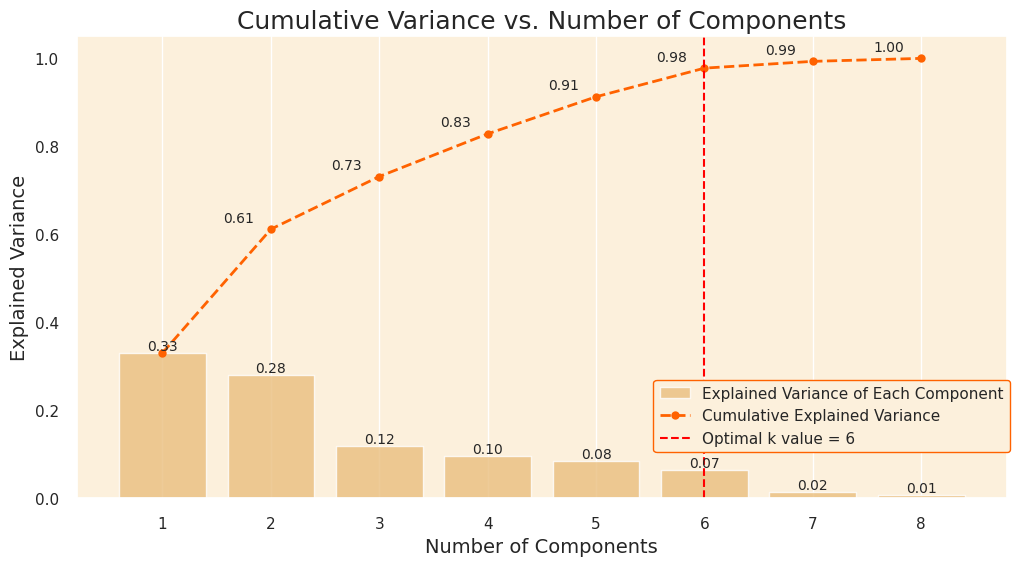

In [ ]:
# Setting CustomerID as the index column
customer_data_scaled.set_index('CustomerID', inplace=True)

# Apply PCA
pca = PCA().fit(customer_data_scaled)

# Calculate the Cumulative Sum of the Explained Variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Set the optimal k value (based on our analysis, we can choose 6)
optimal_k = 6

# Set seaborn plot style
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')

# Plot the cumulative explained variance against the number of components
plt.figure(figsize=(12, 6))

# Bar chart for the explained variance of each component
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)),
                      y=explained_variance_ratio,
                      color='#fcc36d',
                      alpha=0.8)

# Line plot for the cumulative explained variance
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance,
                     marker='o', linestyle='--', color='#ff6200', linewidth=2)

# Plot optimal k value line
optimal_k_line = plt.axvline(optimal_k - 1, color='red', linestyle='--', label=f'Optimal k value = {optimal_k}')

# Set labels and title
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# Customize ticks and legend
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot, optimal_k_line],
           labels=['Explained Variance of Each Component', 'Cumulative Explained Variance', f'Optimal k value = {optimal_k}'],
           loc=(0.62, 0.1),
           frameon=True,
           framealpha=1.0,
           edgecolor='#ff6200')

# Display the variance values for both graphs on the plots
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Conclusion </font></h3>
    
The plot and the cumulative explained variance values indicate how much of the total variance in the dataset is captured by each principal component, as well as the cumulative variance explained by the first n components.

Here, we can observe that:

- The first component explains approximately 28% of the variance.

- The first two components together explain about 49% of the variance.

- The first three components explain approximately 61% of the variance, and so on.

    



In [ ]:
# Creating a PCA object with 6 components
pca = PCA(n_components=6)

# Fitting and transforming the original data to the new PCA dataframe
customer_data_pca = pca.fit_transform(customer_data_scaled)

# Creating a new dataframe from the PCA dataframe, with columns labeled PC1, PC2, etc.
customer_data_pca = pd.DataFrame(customer_data_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

# Adding the CustomerID index back to the new PCA dataframe
customer_data_pca.index = customer_data_scaled.index

In [ ]:
# Displaying the resulting dataframe based on the PCs
customer_data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
CustomerID,,,,,,
12346.0,-1.562921,-2.107429,-0.336167,0.666287,-2.191159,0.818729
12347.0,-1.563034,3.295709,-0.958512,-0.553718,0.948092,0.326087
12349.0,-2.750268,1.069767,-3.550644,2.438824,3.248462,-0.428122
12350.0,-0.462117,-1.754325,-1.228358,-1.425677,-0.435277,1.441595
12352.0,-1.508680,0.362195,0.794947,-0.938249,-0.231928,-0.322461


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

Now, let's extract the coefficients corresponding to each principal component to better understand the transformation performed by PCA:

In [ ]:
# Define a function to highlight the top 3 absolute values in each column of a dataframe
def highlight_top3(column):
    top3 = column.abs().nlargest(3).index
    return ['background-color:  #ffeacc' if i in top3 else '' for i in column.index]

# Create the PCA component DataFrame and apply the highlighting function
pc_df = pd.DataFrame(pca.components_.T, columns=['PC{}'.format(i+1) for i in range(pca.n_components_)],
                     index=customer_data_scaled.columns)

pc_df.style.apply(highlight_top3, axis=0)

,PC1,PC2,PC3,PC4,PC5,PC6
Days_Since_Last_Purchase,-0.217859,-0.013986,0.067660,0.273430,-0.240968,-0.373059
Total_Transactions,0.380301,0.014759,-0.259180,-0.138165,-0.017356,-0.028257
Total_Products_Purchased,0.401425,0.007365,0.069133,-0.134806,0.057476,-0.013373
Total_Spend,0.431260,0.010159,0.065165,-0.092047,0.025202,-0.036947
Average_Transaction_Value,0.176225,-0.015544,0.589050,0.114307,0.021847,-0.101738
Unique_Products_Purchased,0.324992,0.063346,0.014010,-0.230502,-0.193981,0.124604
Average_Days_Between_Purchases,-0.022600,-0.036007,-0.127341,-0.160627,0.753462,0.211787
Day_Of_Week,-0.026572,0.994650,-0.006591,0.028870,0.058359,-0.060799
Hour,-0.024259,0.056388,-0.002019,-0.226832,-0.528881,0.621915
Is_UK,-0.001014,0.007435,-0.018378,-0.013419,-0.005353,0.014384


<a id="kmeans"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 9 | K-Means Clustering</p>
⬆️ [Tabel of Contents](#contents_tabel)

<a id="optimal_k"></a>
# <b><span style='color:#fcc36d'>Step 9.1 |</span><span style='color:#ff6200'> Determining the Optimal Number of Clusters</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

To ascertain the optimal number of clusters (k) for segmenting customers, I will explore two renowned methods:

* __Elbow Method__

* __Silhouette Method__

    
It's common to utilize both methods in practice to corroborate the results.

<a id="elbow"></a>
## <b><span style='color:#fcc36d'>Step 9.1.1 |</span><span style='color:#ff6200'> Elbow Method</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

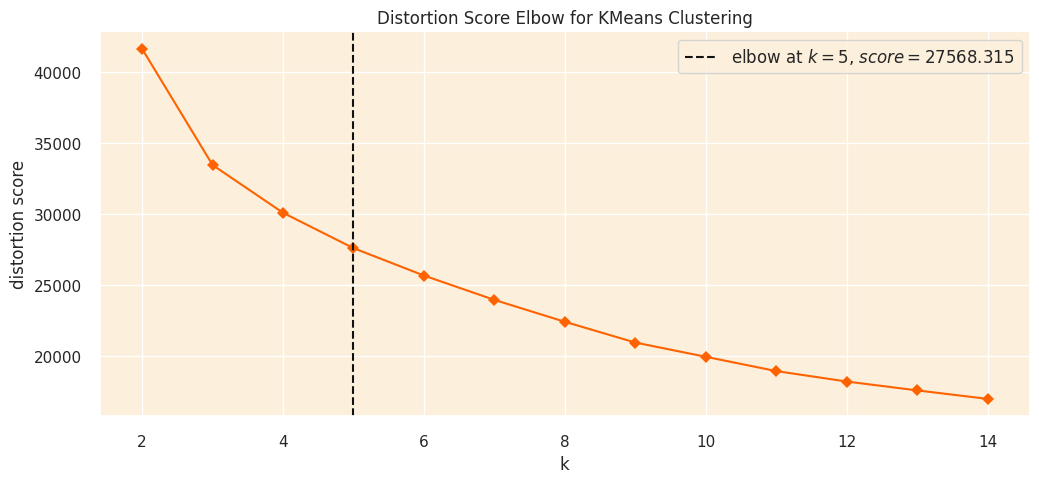

In [ ]:
# Set plot style, and background color
sns.set(style='darkgrid', rc={'axes.facecolor': '#fcf0dc'})

# Set the color palette for the plot
sns.set_palette(['#ff6200'])

# Instantiate the clustering model with the specified parameters
km = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=0)

# Create a figure and axis with the desired size
fig, ax = plt.subplots(figsize=(12, 5))

# Instantiate the KElbowVisualizer with the model and range of k values, and disable the timing plot
visualizer = KElbowVisualizer(km, k=(2, 15), timings=False, ax=ax)

# Fit the data to the visualizer
visualizer.fit(customer_data_pca)

# Finalize and render the figure
visualizer.show();

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

<h3 align="left"><font color=#ff6200>Optimal k Value: Elbow Method Insights</font></h3>

The optimal value of k for the KMeans clustering algorithm can be found at the __elbow point__. Using the YellowBrick library for the Elbow method, we observe that the suggested optimal k value is __5__. However, __we don't have a very distinct elbow point in this case__, which is common in real-world data. From the plot, we can see that the inertia continues to decrease significantly up to k=5, indicating that __the optimum value of k could be between 3 and 7__. To choose the best k within this range, we can employ the __silhouette analysis__, another cluster quality evaluation method. Additionally, incorporating business insights can help determine a practical k value.

<a id="silhouette"></a>
## <b><span style='color:#fcc36d'>Step 9.1.2 |</span><span style='color:#ff6200'> Silhouette Method</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

In [ ]:
def silhouette_analysis(df, start_k, stop_k, figsize=(15, 16)):
    """
    Perform Silhouette analysis for a range of k values and visualize the results.
    """

    # Set the size of the figure
    plt.figure(figsize=figsize)

    # Create a grid with (stop_k - start_k + 1) rows and 2 columns
    grid = gridspec.GridSpec(stop_k - start_k + 1, 2)

    # Assign the first plot to the first row and both columns
    first_plot = plt.subplot(grid[0, :])

    # First plot: Silhouette scores for different k values
    sns.set_palette(['darkorange'])

    silhouette_scores = []

    # Iterate through the range of k values
    for k in range(start_k, stop_k + 1):
        km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=0)
        km.fit(df)
        labels = km.predict(df)
        score = silhouette_score(df, labels)
        silhouette_scores.append(score)

    best_k = start_k + silhouette_scores.index(max(silhouette_scores))

    plt.plot(range(start_k, stop_k + 1), silhouette_scores, marker='o')
    plt.xticks(range(start_k, stop_k + 1))
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette score')
    plt.title('Average Silhouette Score for Different k Values', fontsize=15)

    # Add the optimal k value text to the plot
    optimal_k_text = f'The k value with the highest Silhouette score is: {best_k}'
    plt.text(10, 0.23, optimal_k_text, fontsize=12, verticalalignment='bottom',
             horizontalalignment='left', bbox=dict(facecolor='#fcc36d', edgecolor='#ff6200', boxstyle='round, pad=0.5'))


    # Second plot (subplot): Silhouette plots for each k value
    colors = sns.color_palette("bright")

    for i in range(start_k, stop_k + 1):
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=0)
        row_idx, col_idx = divmod(i - start_k, 2)

        # Assign the plots to the second, third, and fourth rows
        ax = plt.subplot(grid[row_idx + 1, col_idx])

        visualizer = SilhouetteVisualizer(km, colors=colors, ax=ax)
        visualizer.fit(df)

        # Add the Silhouette score text to the plot
        score = silhouette_score(df, km.labels_)
        ax.text(0.97, 0.02, f'Silhouette Score: {score:.2f}', fontsize=12, \
                ha='right', transform=ax.transAxes, color='red')

        ax.set_title(f'Silhouette Plot for {i} Clusters', fontsize=15)

    plt.tight_layout()
    plt.show()

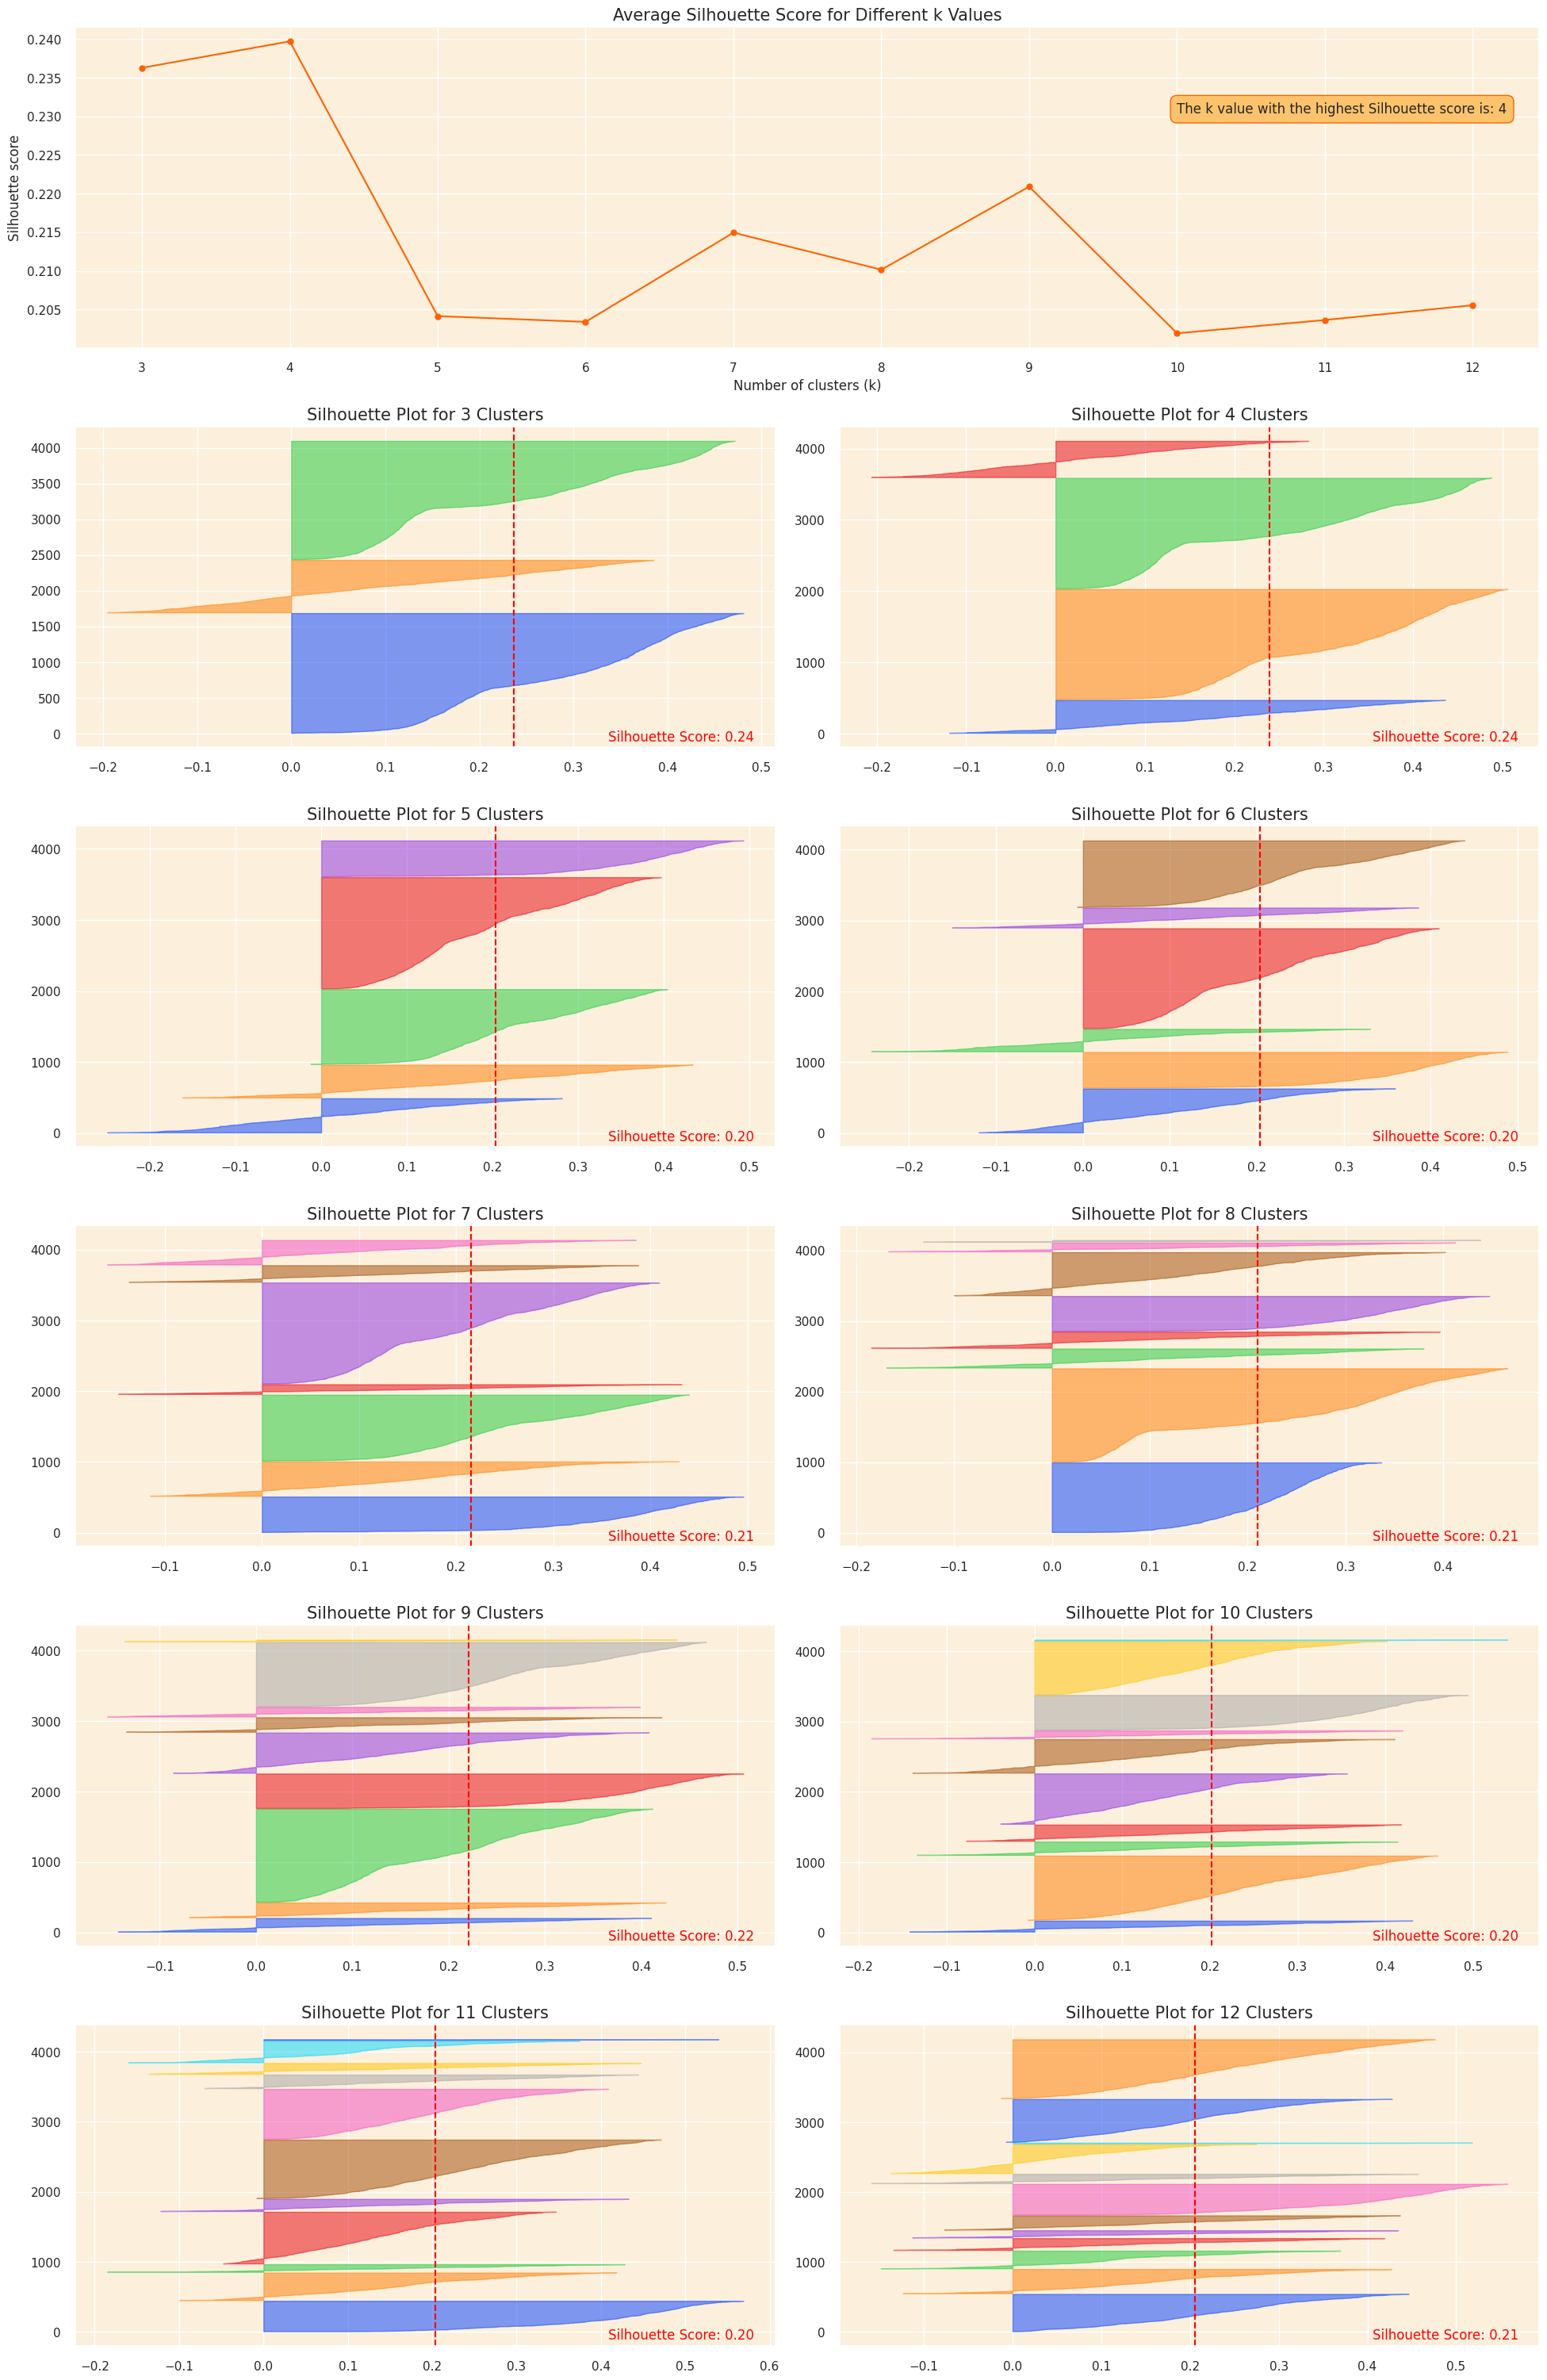

In [ ]:
#silhouette_analysis(customer_data_pca, 3, 12, figsize=(20, 50))

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

<h3 align="left"><font color=#ff6200>Optimal k Value: Silhouette Method Insights</font></h3>

Based on above guidelines and after carefully considering the silhouette plots, it's clear that choosing __\( k = 3 \)__ is the better option. This choice gives us clusters that are more evenly matched and well-defined, making our clustering solution stronger and more reliable.

<a id="kmeans_model"></a>
# <b><span style='color:#fcc36d'>Step 9.2 |</span><span style='color:#ff6200'> Clustering Model - K-means</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

In this step, I am going to apply the K-means clustering algorithm to segment customers into different clusters based on their purchasing behaviors and other characteristics, using the optimal number of clusters determined in the previous step.

It's important to note that the K-means algorithm might assign different labels to the clusters in each run. To address this, we have taken an additional step to swap the labels based on the frequency of samples in each cluster, ensuring a consistent label assignment across different runs.

In [ ]:
# Apply KMeans clustering using the optimal k
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(customer_data_pca)

# Get the frequency of each cluster
cluster_frequencies = Counter(kmeans.labels_)

# Create a mapping from old labels to new labels based on frequency
label_mapping = {label: new_label for new_label, (label, _) in
                 enumerate(cluster_frequencies.most_common())}

# Reverse the mapping to assign labels as per your criteria
label_mapping = {v: k for k, v in {2: 1, 1: 0, 0: 2}.items()}

# Apply the mapping to get the new labels
new_labels = np.array([label_mapping[label] for label in kmeans.labels_])

# Append the new cluster labels back to the original dataset
customer_data_cleaned['cluster'] = new_labels

# Append the new cluster labels to the PCA version of the dataset
customer_data_pca['cluster'] = new_labels

In [ ]:
# Display the first few rows of the original dataframe
customer_data_cleaned.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,cluster
0,12346.0,325,2,0,0.0,0.0,1,0.0,1,10,1,1,0.5,0.0,0.0,0.0,1
1,12347.0,2,7,2458,4310.0,615.714286,103,2.016575,1,14,0,0,0.0,615.714286,341.070789,4.486071,2
2,12348.0,75,4,2332,1437.24,359.31,21,10.884615,3,19,0,0,0.0,359.31,203.875689,-100.884,0
3,12349.0,18,1,630,1457.55,1457.55,72,0.0,0,9,0,0,0.0,1457.55,0.0,0.0,1
4,12350.0,310,1,196,294.4,294.4,16,0.0,2,16,0,0,0.0,294.4,0.0,0.0,1


<a id="evaluation"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 10 | Clustering Evaluation</p>
⬆️ [Tabel of Contents](#contents_tabel)

<a id="3d_visualization"></a>
# <b><span style='color:#fcc36d'>Step 10.1 |</span><span style='color:#ff6200'>  3D Visualization of Top Principal Components</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

In this part, I am going to choose the top 3 PCs (which capture the most variance in the data) and use them to create a 3D visualization. This will allow us to visually inspect the quality of separation and cohesion of clusters to some extent:

In [ ]:
# Setting up the color scheme for the clusters (RGB order)
colors = ['#e8000b', '#1ac938', '#023eff']

In [ ]:
# Create separate data frames for each cluster
cluster_0 = customer_data_pca[customer_data_pca['cluster'] == 0]
cluster_1 = customer_data_pca[customer_data_pca['cluster'] == 1]
cluster_2 = customer_data_pca[customer_data_pca['cluster'] == 2]

# Create a 3D scatter plot
fig = go.Figure()

# Add data points for each cluster separately and specify the color
fig.add_trace(go.Scatter3d(x=cluster_0['PC1'], y=cluster_0['PC2'], z=cluster_0['PC3'],
                           mode='markers', marker=dict(color=colors[0], size=5, opacity=0.4), name='Cluster 0'))
fig.add_trace(go.Scatter3d(x=cluster_1['PC1'], y=cluster_1['PC2'], z=cluster_1['PC3'],
                           mode='markers', marker=dict(color=colors[1], size=5, opacity=0.4), name='Cluster 1'))
fig.add_trace(go.Scatter3d(x=cluster_2['PC1'], y=cluster_2['PC2'], z=cluster_2['PC3'],
                           mode='markers', marker=dict(color=colors[2], size=5, opacity=0.4), name='Cluster 2'))

# Set the title and layout details
fig.update_layout(
    title=dict(text='3D Visualization of Customer Clusters in PCA Space', x=0.5),
    scene=dict(
        xaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC1'),
        yaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC2'),
        zaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC3'),
    ),
    width=900,
    height=800
)

# Show the plot
fig.show()

<a id="cluster_distributuion"></a>
# <b><span style='color:#fcc36d'>Step 10.2 |</span><span style='color:#ff6200'>  Cluster Distribution Visualization</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
I am going to utilize a bar plot to visualize the percentage of customers in each cluster, which helps in understanding if the clusters are balanced and significant:

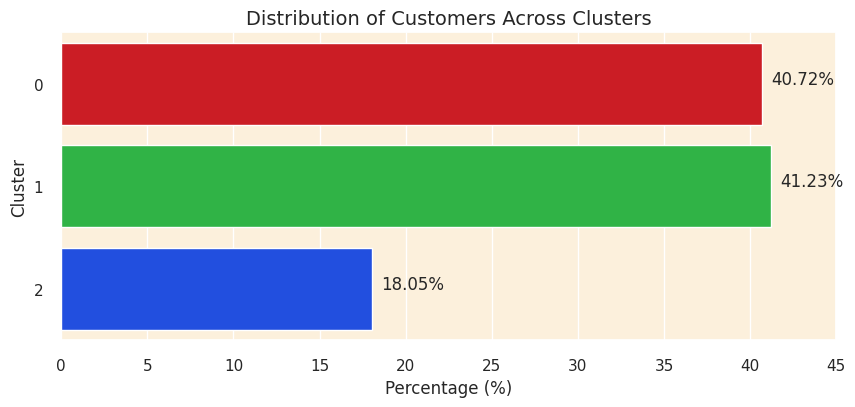

In [ ]:
# Calculate the percentage of customers in each cluster
cluster_percentage = (customer_data_pca['cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h', palette=colors)

# Adding percentages on the bars
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value+0.5, index, f'{value:.2f}%')

plt.title('Distribution of Customers Across Clusters', fontsize=14)
plt.xticks(ticks=np.arange(0, 50, 5))
plt.xlabel('Percentage (%)')

# Show the plot
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Inference</font></h3>
    
The distribution of customers across the clusters, as depicted by the bar plot, suggests a fairly balanced distribution with clusters 0 and 1 holding around 41% of customers each and cluster 2 accommodating approximately 18% of the customers.

This balanced distribution indicates that our clustering process has been largely successful in identifying meaningful patterns within the data, rather than merely grouping noise or outliers. It implies that each cluster represents a substantial and distinct segment of the customer base, thereby offering valuable insights for future business strategies.

Moreover, the fact that no cluster contains a very small percentage of customers, assures us that each cluster is significant and not just representing outliers or noise in the data. This setup allows for a more nuanced understanding and analysis of different customer segments, facilitating effective and informed decision-making.


<a id="evaluations_metrics"></a>
# <b><span style='color:#fcc36d'>Step 10.3 |</span><span style='color:#ff6200'> Evaluation Metrics</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

In [ ]:
# Compute number of customers
num_observations = len(customer_data_pca)

# Separate the features and the cluster labels
X = customer_data_pca.drop('cluster', axis=1)
clusters = customer_data_pca['cluster']

# Compute the metrics
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Create a table to display the metrics and the number of observations
table_data = [
    ["Number of Observations", num_observations],
    ["Silhouette Score", sil_score],
    ["Calinski Harabasz Score", calinski_score],
    ["Davies Bouldin Score", davies_score]
]

# Print the table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+-------------------------+---------------------+
|         Metric          |        Value        |
+-------------------------+---------------------+
| Number of Observations  |        4067         |
|    Silhouette Score     | 0.23627137022779915 |
| Calinski Harabasz Score | 1257.1794962921565  |
|  Davies Bouldin Score   |  1.368405537299603  |
+-------------------------+---------------------+


<a id="profiling"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 11 | Cluster Analysis and Profiling</p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
In this section, I am going to analyze the characteristics of each cluster to understand the distinct behaviors and preferences of different customer segments and also profile each cluster to identify the key traits that define the customers in each cluster.

<a id="radar_chart"></a>
# <b><span style='color:#fcc36d'>Step 11.1 |</span><span style='color:#ff6200'> Radar Chart Approach</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
First of all, I am going to create radar charts to visualize the centroid values of each cluster across different features. This can give a quick visual comparison of the profiles of different clusters.To construct the radar charts, it's essential to first compute the centroid for each cluster. This centroid represents the mean value for all features within a specific cluster. Subsequently, I will display these centroids on the radar charts, facilitating a clear visualization of the central tendencies of each feature across the various clusters:

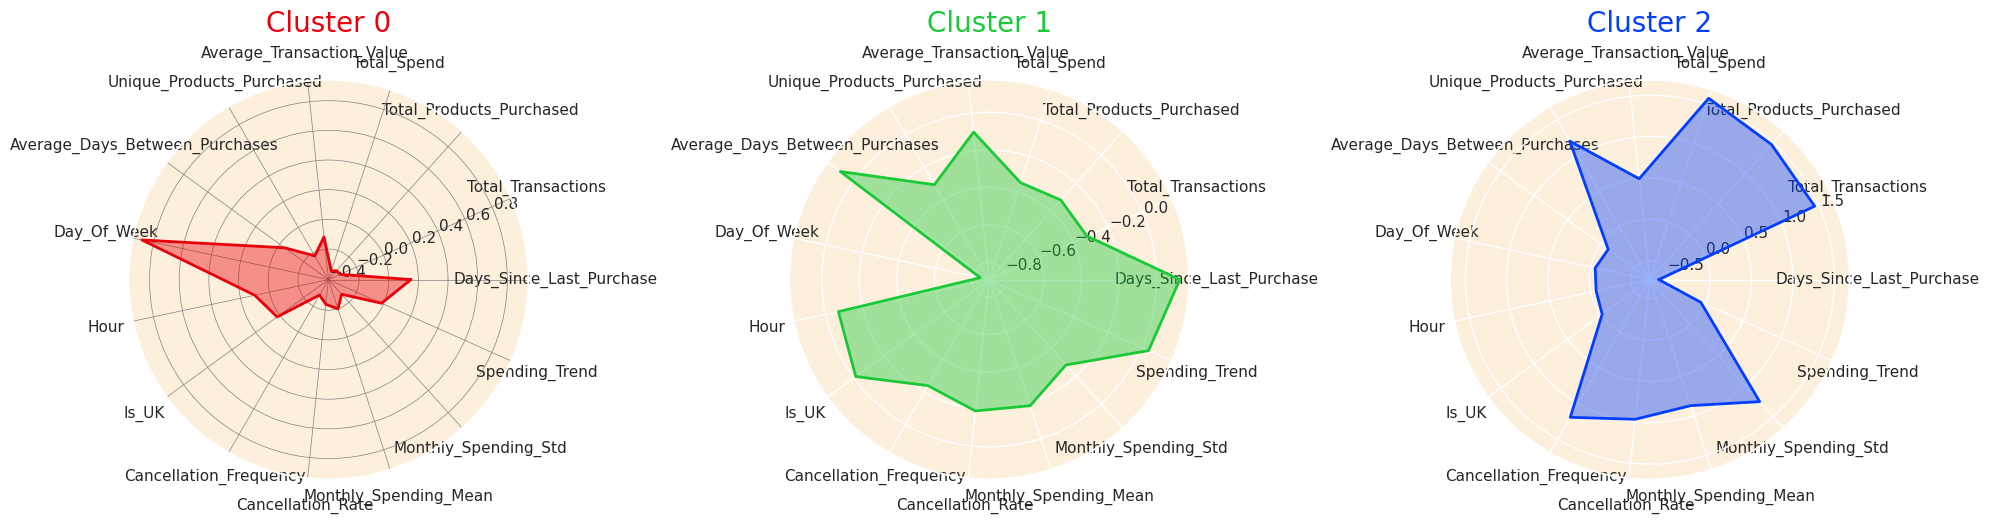

In [ ]:
# Setting 'CustomerID' column as index and assigning it to a new dataframe
df_customer = customer_data_cleaned.set_index('CustomerID')

# Standardize the data (excluding the cluster column)
scaler = StandardScaler()
df_customer_standardized = scaler.fit_transform(df_customer.drop(columns=['cluster'], axis=1))

# Create a new dataframe with standardized values and add the cluster column back
df_customer_standardized = pd.DataFrame(df_customer_standardized, columns=df_customer.columns[:-1], index=df_customer.index)
df_customer_standardized['cluster'] = df_customer['cluster']

# Calculate the centroids of each cluster
cluster_centroids = df_customer_standardized.groupby('cluster').mean()

# Function to create a radar chart
def create_radar_chart(ax, angles, data, color, cluster):
    # Plot the data and fill the area
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')

    # Add a title
    ax.set_title(f'Cluster {cluster}', size=20, color=color, y=1.1)

# Set data
labels=np.array(cluster_centroids.columns)
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start to the end
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

# Initialize the figure
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(polar=True), nrows=1, ncols=3)

# Create radar chart for each cluster
for i, color in enumerate(colors):
    data = cluster_centroids.loc[i].tolist()
    data += data[:1]  # Complete the loop
    create_radar_chart(ax[i], angles, data, color, i)

# Add input data
ax[0].set_xticks(angles[:-1])
ax[0].set_xticklabels(labels[:-1])

ax[1].set_xticks(angles[:-1])
ax[1].set_xticklabels(labels[:-1])

ax[2].set_xticks(angles[:-1])
ax[2].set_xticklabels(labels[:-1])

# Add a grid
ax[0].grid(color='grey', linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
<h2 align="left"><font color=#ff6200>Customer Profiles Derived from Radar Chart Analysis</font></h2>
    
<h3 align="left"><font color=red>Cluster 0 (Red Chart):</font></h3>

🎯 Profile: __Sporadic Shoppers with a Preference for Weekend Shopping__  

- Customers in this cluster tend to spend less, with a lower number of transactions and products purchased.  
- They have a slight tendency to shop during the weekends, as indicated by the very high `Day_of_Week` value.  
- Their spending trend is relatively stable but on the lower side, and they have a low monthly spending variation (low `Monthly_Spending_Std`).  
- These customers have not engaged in many cancellations, showing a low cancellation frequency and rate.  
- The average transaction value is on the lower side, indicating that when they do shop, they tend to spend less per transaction.  

____
    
<h3 align="left"><font color=green>Cluster 1 (Green Chart):</font></h3>    

🎯 Profile: __Infrequent Big Spenders with a High Spending Trend__  
    
- Customers in this cluster show a moderate level of spending, but their transactions are not very frequent, as indicated by the high `Days_Since_Last_Purchase` and `Average_Days_Between_Purchases`.  
- They have a very high spending trend, indicating that their spending has been increasing over time.  
- These customers prefer shopping late in the day, as indicated by the high `Hour` value, and they mainly reside in the UK.  
- They have a tendency to cancel a moderate number of transactions, with a medium cancellation frequency and rate.  
- Their average transaction value is relatively high, meaning that when they shop, they tend to make substantial purchases.  

____
    
<h3 align="left"><font color=blue>Cluster 2 (Blue Chart):</font></h3>   

🎯 Profile: __Frequent High-Spenders with a High Rate of Cancellations__
    
- Customers in this cluster are high spenders with a very high total spend, and they purchase a wide variety of unique products.  
- They engage in frequent transactions, but also have a high cancellation frequency and rate.  
- These customers have a very low average time between purchases, and they tend to shop early in the day (low `Hour` value).  
- Their monthly spending shows high variability, indicating that their spending patterns might be less predictable compared to other clusters.  
- Despite their high spending, they show a low spending trend, suggesting that their high spending levels might be decreasing over time.  

<a id="histogram"></a>
# <b><span style='color:#fcc36d'>Step 11.2 |</span><span style='color:#ff6200'> Histogram Chart Approach</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
To validate the profiles identified from the radar charts, we can plot histograms for each feature segmented by the cluster labels. These histograms will allow us to visually inspect the distribution of feature values within each cluster, thereby confirming or refining the profiles we have created based on the radar charts.

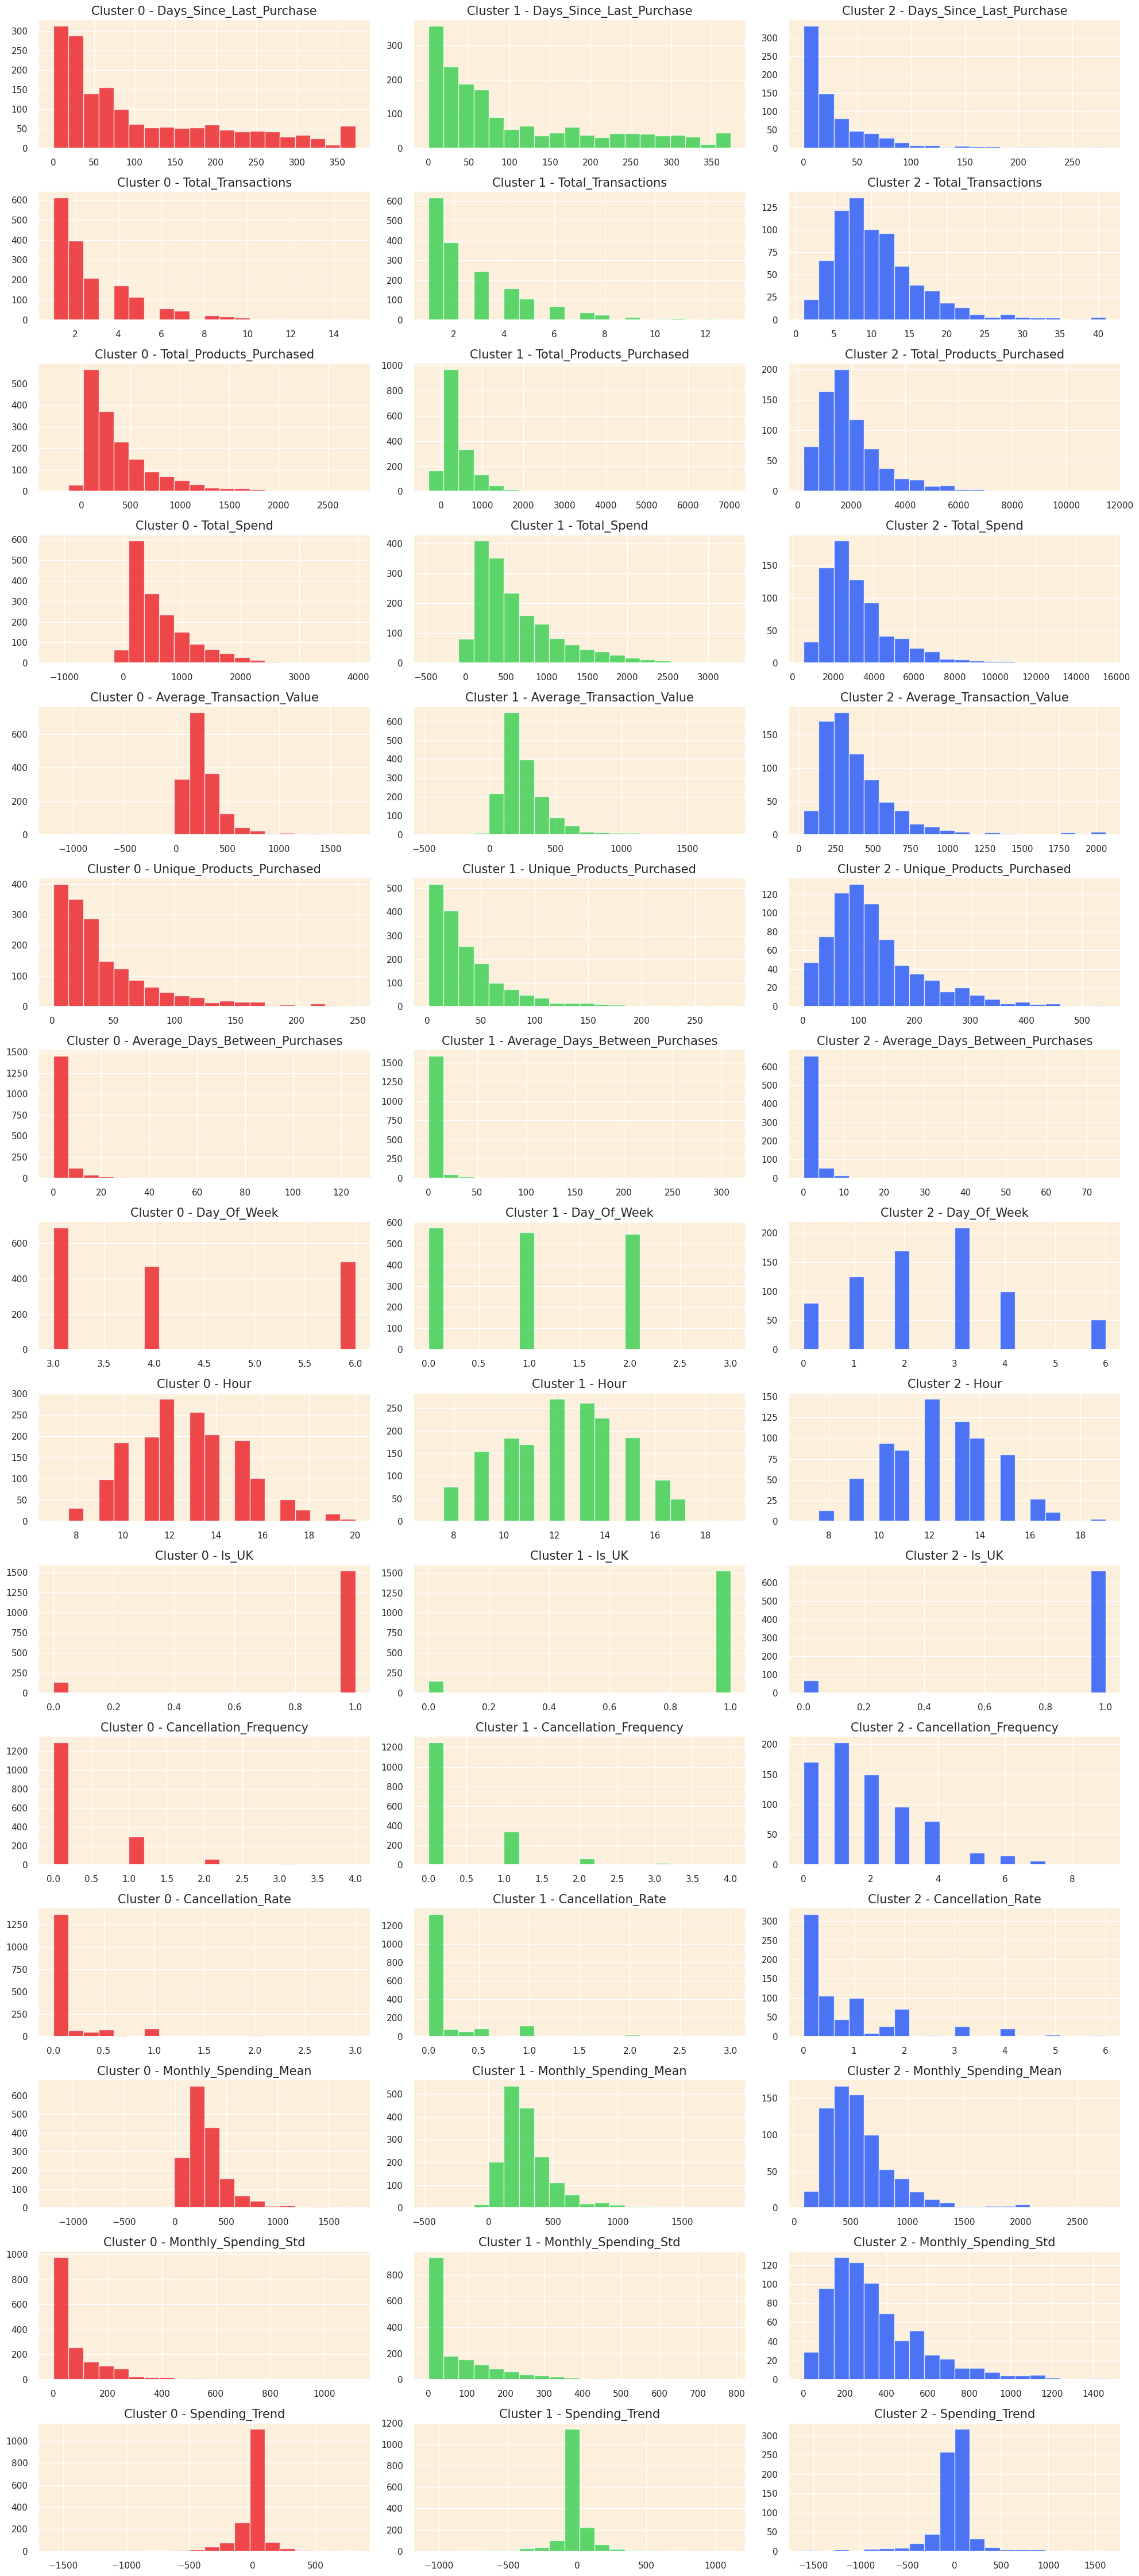

In [ ]:
# Plot histograms for each feature segmented by the clusters
features = customer_data_cleaned.columns[1:-1]
clusters = customer_data_cleaned['cluster'].unique()
clusters.sort()

# Setting up the subplots
n_rows = len(features)
n_cols = len(clusters)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows))

# Plotting histograms
for i, feature in enumerate(features):
    for j, cluster in enumerate(clusters):
        data = customer_data_cleaned[customer_data_cleaned['cluster'] == cluster][feature]
        axes[i, j].hist(data, bins=20, color=colors[j], edgecolor='w', alpha=0.7)
        axes[i, j].set_title(f'Cluster {cluster} - {feature}', fontsize=15)
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')

# Adjusting layout to prevent overlapping
plt.tight_layout()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

The detailed insights from the histograms provide a more nuanced understanding of each cluster, helping in refining the profiles to represent the customer behaviors more accurately. Based on the detailed analysis from both the radar charts and the histograms, here are the refined profiles and titles for each cluster:

<img src="https://github.com/FarzadNekouee/Retail_Customer_Segmentation_Recommendation_System/blob/master/profiles.png?raw=true" width="2400">

<a id="recommendation_system"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 12 | Recommendation System</p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

In the final phase of this project, I am set to develop a recommendation system to enhance the online shopping experience. This system will suggest products to customers based on the purchasing patterns prevalent in their respective clusters.

We analyze the cleansed customer data to pinpoint the top-selling products within each cluster. Leveraging this information, the system will craft personalized recommendations, suggesting __the top three products__ popular within their cluster that they have not yet purchased. This not only facilitates targeted marketing strategies but also enriches the personal shopping experience, potentially boosting sales. For the outlier group, a basic approach could be to recommend random products, as a starting point to engage them.

In [ ]:
# Step 1: Extract the CustomerIDs of the outliers and remove their transactions from the main dataframe
outlier_customer_ids = outliers_data['CustomerID'].astype('float').unique()
df_filtered = df[~df['CustomerID'].isin(outlier_customer_ids)]

# Step 2: Ensure consistent data type for CustomerID across both dataframes before merging
customer_data_cleaned['CustomerID'] = customer_data_cleaned['CustomerID'].astype('float')

# Step 3: Merge the transaction data with the customer data to get the cluster information for each transaction
merged_data = df_filtered.merge(customer_data_cleaned[['CustomerID', 'cluster']], on='CustomerID', how='inner')

# Step 4: Identify the top 10 best-selling products in each cluster based on the total quantity sold
best_selling_products = merged_data.groupby(['cluster', 'StockCode', 'Description'])['Quantity'].sum().reset_index()
best_selling_products = best_selling_products.sort_values(by=['cluster', 'Quantity'], ascending=[True, False])
top_products_per_cluster = best_selling_products.groupby('cluster').head(10)

# Step 5: Create a record of products purchased by each customer in each cluster
customer_purchases = merged_data.groupby(['CustomerID', 'cluster', 'StockCode'])['Quantity'].sum().reset_index()

# Step 6: Generate recommendations for each customer in each cluster
recommendations = []
for cluster in top_products_per_cluster['cluster'].unique():
    top_products = top_products_per_cluster[top_products_per_cluster['cluster'] == cluster]
    customers_in_cluster = customer_data_cleaned[customer_data_cleaned['cluster'] == cluster]['CustomerID']

    for customer in customers_in_cluster:
        # Identify products already purchased by the customer
        customer_purchased_products = customer_purchases[(customer_purchases['CustomerID'] == customer) &
                                                         (customer_purchases['cluster'] == cluster)]['StockCode'].tolist()

        # Find top 3 products in the best-selling list that the customer hasn't purchased yet
        top_products_not_purchased = top_products[~top_products['StockCode'].isin(customer_purchased_products)]
        top_3_products_not_purchased = top_products_not_purchased.head(3)

        # Append the recommendations to the list
        recommendations.append([customer, cluster] + top_3_products_not_purchased[['StockCode', 'Description']].values.flatten().tolist())

# Step 7: Create a dataframe from the recommendations list and merge it with the original customer data
recommendations_df = pd.DataFrame(recommendations, columns=['CustomerID', 'cluster', 'Rec1_StockCode', 'Rec1_Description', \
                                                 'Rec2_StockCode', 'Rec2_Description', 'Rec3_StockCode', 'Rec3_Description'])
customer_data_with_recommendations = customer_data_cleaned.merge(recommendations_df, on=['CustomerID', 'cluster'], how='right')

In [ ]:
# Display 10 random rows from the customer_data_with_recommendations dataframe
customer_data_with_recommendations.set_index('CustomerID').iloc[:, -6:].sample(10, random_state=0)

,Rec1_StockCode,Rec1_Description,Rec2_StockCode,Rec2_Description,Rec3_StockCode,Rec3_Description
CustomerID,,,,,,
15746.0,84879,ASSORTED COLOUR BIRD ORNAMENT,15036,ASSORTED COLOURS SILK FAN,85123A,WHITE HANGING HEART T-LIGHT HOLDER
15728.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,84879,ASSORTED COLOUR BIRD ORNAMENT,15036,ASSORTED COLOURS SILK FAN
17459.0,18007,ESSENTIAL BALM 3.5G TIN IN ENVELOPE,84879,ASSORTED COLOUR BIRD ORNAMENT,17003,BROCADE RING PURSE
17415.0,18007,ESSENTIAL BALM 3.5G TIN IN ENVELOPE,84879,ASSORTED COLOUR BIRD ORNAMENT,17003,BROCADE RING PURSE
15339.0,18007,ESSENTIAL BALM 3.5G TIN IN ENVELOPE,84879,ASSORTED COLOUR BIRD ORNAMENT,17003,BROCADE RING PURSE
14335.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,84879,ASSORTED COLOUR BIRD ORNAMENT,15036,ASSORTED COLOURS SILK FAN
15367.0,22616,PACK OF 12 LONDON TISSUES,84879,ASSORTED COLOUR BIRD ORNAMENT,16014,SMALL CHINESE STYLE SCISSOR
17604.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,84879,ASSORTED COLOUR BIRD ORNAMENT,15036,ASSORTED COLOURS SILK FAN
17828.0,22616,PACK OF 12 LONDON TISSUES,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,85099B,JUMBO BAG RED RETROSPOT
